## Vacant Land Data: Community Boundaries 

Communities are one of the most complex geographic issues in the County of Los Angeles, due to historical narratives, perceptions of value, intense public interest, and shifts over time. The County has a need to establish a consistent geographic reporting base that will enable statistics and information to reported to the Board, that attempts to represent all of the interactions but is primarily focused on reporting.

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
boundaries = gpd.read_file("Community Boundaries (CSA).geojson")

In [3]:
type (boundaries)

geopandas.geodataframe.GeoDataFrame

In [4]:
boundaries.info

<bound method DataFrame.info of                    community   source  \
0                       None      BOS   
1                       None      BOS   
2            Harvard Heights  LA City   
3    Westfield/Academy Hills      BOS   
4              Beverly Crest  LA City   
..                       ...      ...   
343                     None      BOS   
344              Willowbrook      BOS   
345             Shadow Hills  LA City   
346               West Hills  LA City   
347                     None      BOS   

                                        label       city_type objectid  \
0                        City of Agoura Hills            City        1   
1                         City of Temple City            City      214   
2               Los Angeles - Harvard Heights            City       95   
3    Unincorporated - Westfield/Academy Hills  Unincorporated      334   
4                 Los Angeles - Beverly Crest            City       55   
..                             

In [5]:
boundaries.head()

community   source                                     label  \
0                     None      BOS                      City of Agoura Hills   
1                     None      BOS                       City of Temple City   
2          Harvard Heights  LA City             Los Angeles - Harvard Heights   
3  Westfield/Academy Hills      BOS  Unincorporated - Westfield/Academy Hills   
4            Beverly Crest  LA City               Los Angeles - Beverly Crest   

        city_type objectid           lcity      shape_stlength  \
0            City        1    Agoura Hills  80374.083443170195   
1            City      214     Temple City  60506.140608433387   
2            City       95     Los Angeles  21077.385705038188   
3  Unincorporated      334  Unincorporated  17831.004587317788   
4            City       55     Los Angeles  110820.54850926602   

         shape_starea                                           geometry  
0  217940117.12695313  MULTIPOLYGON (((-118.72864 34.16793, -118.7286...  
1  112232462.72851563  MULTIPOLYGON (((-118.05659 34.11841, -118.0563...  
2   20898421.74609375  MULTIPOLYGON (((-118.29156 34.04000, -118.2923...  
3  14591857.321289063  MULTIPOLYGON (((-118.34845 33.77939, -118.3488...  
4  234233281.15039063  MULTIPOLYGON (((-118.40751 34.12945, -118.4074...

I was able to get the basic information of my data set to make sure it imported correctly.

In [6]:
boundaries.dtypes

community           object
source              object
label               object
city_type           object
objectid            object
lcity               object
shape_stlength      object
shape_starea        object
geometry          geometry
dtype: object

In [7]:
list(boundaries)

['community',
 'source',
 'label',
 'city_type',
 'objectid',
 'lcity',
 'shape_stlength',
 'shape_starea',
 'geometry']

<AxesSubplot:>

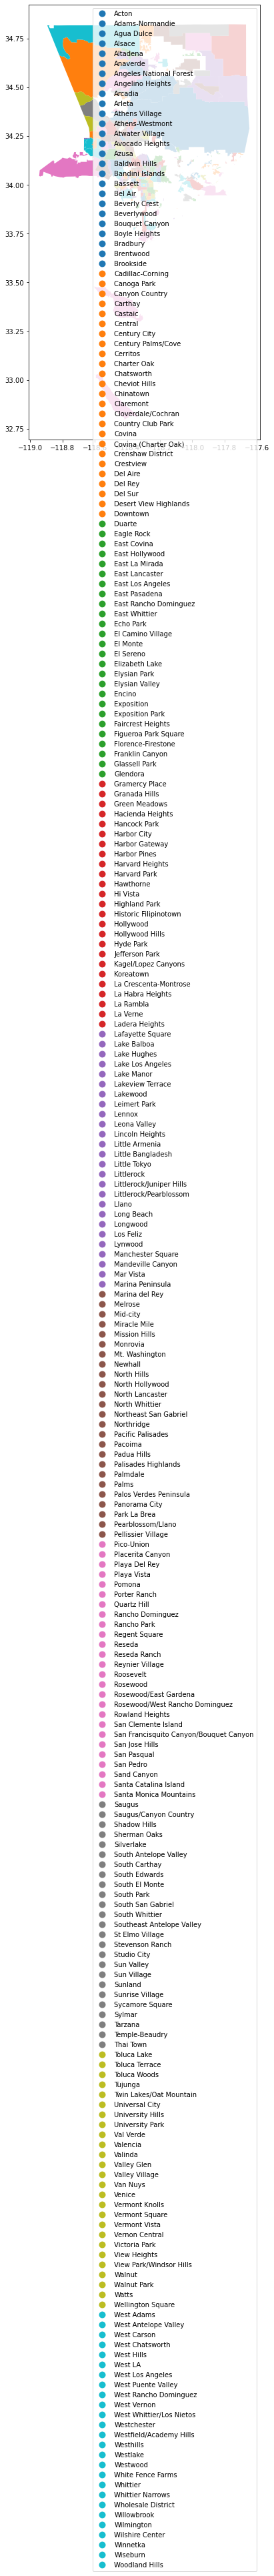

In [8]:
boundaries.plot(figsize=(12,12),
                          column='community',
                          legend=True)

### Creating New Data Frame

I plotted it to see the entire data set, Now i want to narrow down to El Sereno and Lincoln Heights.

In [9]:
boundaries[boundaries.community == 'El Sereno']

community   source                    label city_type objectid  \
116  El Sereno  LA City  Los Angeles - El Sereno      City       78   

           lcity      shape_stlength        shape_starea  \
116  Los Angeles  57287.733092284157  109050969.50683594   

                                              geometry  
116  MULTIPOLYGON (((-118.15536 34.09867, -118.1553...

In [10]:
boundaries[boundaries.community == 'Lincoln Heights']

community   source                          label city_type  \
152  Lincoln Heights  LA City  Los Angeles - Lincoln Heights      City   

    objectid        lcity      shape_stlength        shape_starea  \
152      108  Los Angeles  60756.009942239587  91056715.407226563   

                                              geometry  
152  MULTIPOLYGON (((-118.19006 34.09722, -118.1903...

In [11]:
boundaries[boundaries.community == 'Chinatown']

community   source                    label city_type objectid  \
123  Chinatown  LA City  Los Angeles - Chinatown      City       68   

           lcity      shape_stlength        shape_starea  \
123  Los Angeles  14754.461110663206  11187362.533203125   

                                              geometry  
123  MULTIPOLYGON (((-118.23789 34.05411, -118.2380...

In [12]:
boundaries[boundaries.community == 'Echo Park']

community   source                    label city_type objectid  \
134  Echo Park  LA City  Los Angeles - Echo Park      City       77   

           lcity      shape_stlength        shape_starea  \
134  Los Angeles  26540.216685480205  27755067.791992188   

                                              geometry  
134  MULTIPOLYGON (((-118.24619 34.08774, -118.2477...

In [13]:
boundaries[boundaries.community == 'Elysian Park']

community   source                       label city_type objectid  \
238  Elysian Park  LA City  Los Angeles - Elysian Park      City       79   

           lcity      shape_stlength        shape_starea  \
238  Los Angeles  39718.047520712687  48791230.741210938   

                                              geometry  
238  MULTIPOLYGON (((-118.22788 34.08316, -118.2276...

Now, I will create a new datafame with only those 5 community boundaries.

In [14]:
boundaries_new = boundaries.loc[[116,152, 123, 134, 238]]

In [15]:
boundaries_new

community   source                          label city_type  \
116        El Sereno  LA City        Los Angeles - El Sereno      City   
152  Lincoln Heights  LA City  Los Angeles - Lincoln Heights      City   
123        Chinatown  LA City        Los Angeles - Chinatown      City   
134        Echo Park  LA City        Los Angeles - Echo Park      City   
238     Elysian Park  LA City     Los Angeles - Elysian Park      City   

    objectid        lcity      shape_stlength        shape_starea  \
116       78  Los Angeles  57287.733092284157  109050969.50683594   
152      108  Los Angeles  60756.009942239587  91056715.407226563   
123       68  Los Angeles  14754.461110663206  11187362.533203125   
134       77  Los Angeles  26540.216685480205  27755067.791992188   
238       79  Los Angeles  39718.047520712687  48791230.741210938   

                                              geometry  
116  MULTIPOLYGON (((-118.15536 34.09867, -118.1553...  
152  MULTIPOLYGON (((-118.19006 34.09722, -118.1903...  
123  MULTIPOLYGON (((-118.23789 34.05411, -118.2380...  
134  MULTIPOLYGON (((-118.24619 34.08774, -118.2477...  
238  MULTIPOLYGON (((-118.22788 34.08316, -118.2276...

<AxesSubplot:>

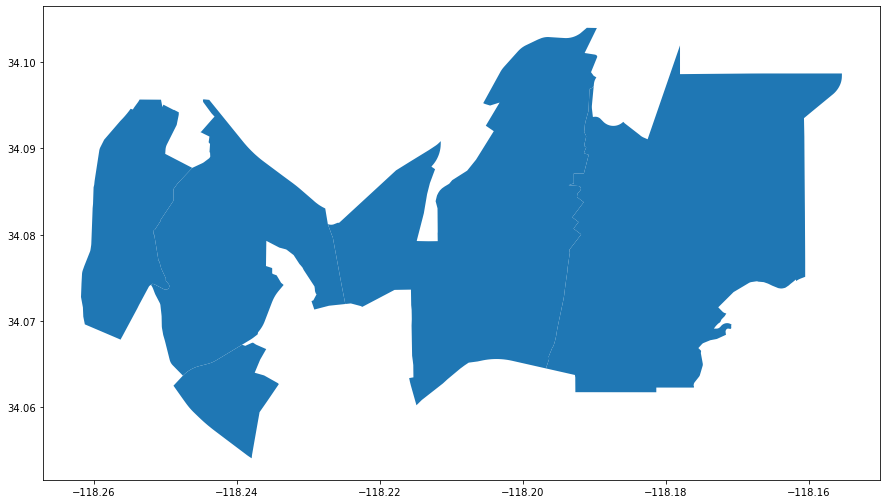

In [16]:
boundaries_new.plot(figsize=(15,15))

### Adding Basemap

In [17]:
boundaries_new.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
boundaries_new_wm = boundaries_new.to_crs(epsg=3857)

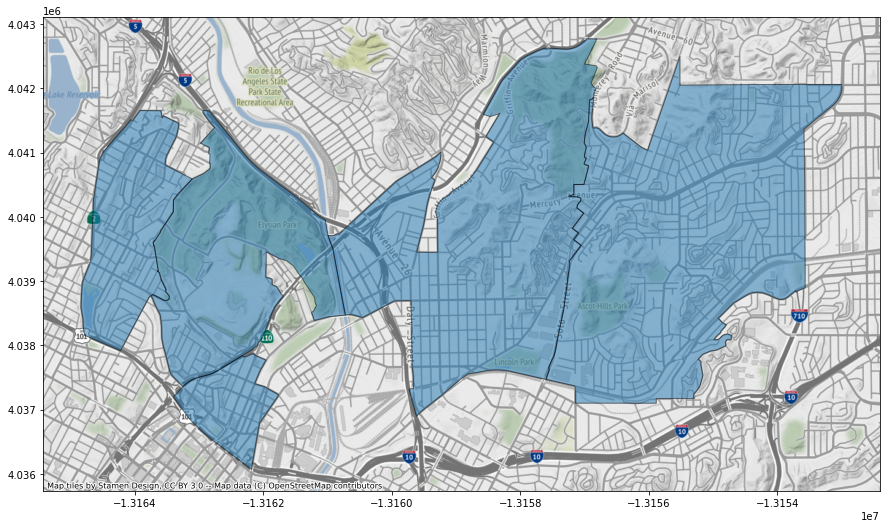

In [19]:
ax = boundaries_new_wm.plot(figsize=(15, 15), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax) 

Import LA Zoning

In [20]:
# api url for ZONING AREAS
zone = gpd.read_file('zones.geojson')


In [21]:
zone.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58568 entries, 0 to 58567
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         58568 non-null  int64   
 1   shape_area  58568 non-null  float64 
 2   shape_len   58568 non-null  float64 
 3   zone_cmplt  58568 non-null  object  
 4   ORIG_FID    58568 non-null  int64   
 5   geometry    58568 non-null  geometry
dtypes: float64(2), geometry(1), int64(2), object(1)
memory usage: 2.7+ MB


In [22]:
zone.head ()

FID    shape_area   shape_len    zone_cmplt  ORIG_FID  \
0    0  12495.771484  449.920411  (F)CM-1-CUGU         0   
1    1  24992.793945  649.920555  (F)CM-1-CUGU         1   
2    2   6248.760742  349.950350  (F)CM-1-CUGU         2   
3    3   6248.511719  349.940361  (F)CM-1-CUGU         3   
4    4  12497.520508  449.940411  (F)CM-1-CUGU         4   

                      geometry  
0  POINT (-118.38813 34.22876)  
1  POINT (-118.38814 34.22958)  
2  POINT (-118.38814 34.23020)  
3  POINT (-118.38814 34.23048)  
4  POINT (-118.38815 34.23154)

In [23]:
zone.tail()

FID     shape_area    shape_len zone_cmplt  ORIG_FID  \
58563  58563  869907.359375  4240.945774  [Q]OS-1XL     58563   
58564  58564   21333.867188   577.026015  [Q]C4-1VL     58564   
58565  58565   81900.763672  1145.008854  [Q]CR-1VL     58565   
58566  58566   20744.690430   583.092351  [Q]CR-1VL     58566   
58567  58567    9962.174805   411.253229  [Q]CR-1VL     58567   

                          geometry  
58563  POINT (-118.47520 34.28094)  
58564  POINT (-118.62298 34.19339)  
58565  POINT (-118.62275 34.19231)  
58566  POINT (-118.62293 34.19296)  
58567  POINT (-118.62252 34.19342)

In [24]:
zone.shape

(58568, 6)

In [25]:
list (zone)

['FID', 'shape_area', 'shape_len', 'zone_cmplt', 'ORIG_FID', 'geometry']

<AxesSubplot:>

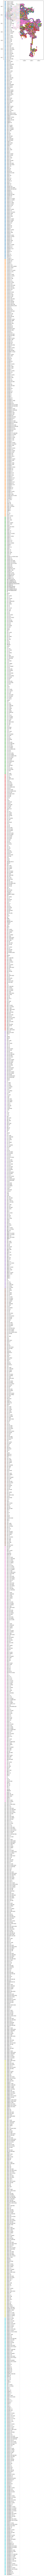

In [26]:
zone.plot(figsize=(12,12),
                          column='zone_cmplt',
                          legend=True)

In [28]:
# for interactive plots
import plotly.express as px

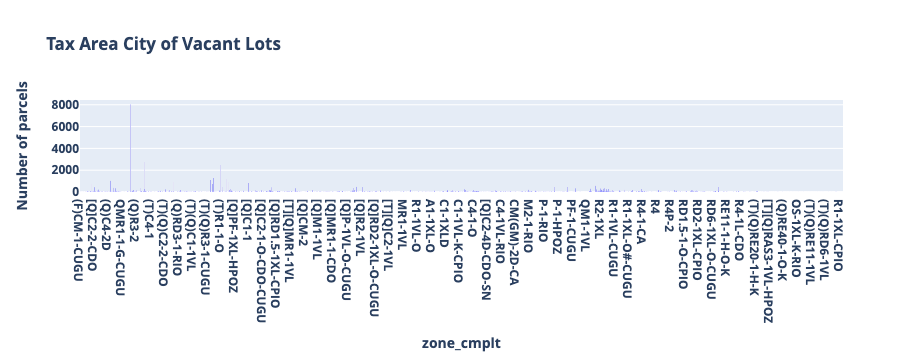

In [29]:

# add labels by providing a dict
fig = px.bar(
        zone,
       x='zone_cmplt',
       title='Tax Area City of Vacant Lots',
        labels={
            'taxratearea_city':'Tax Area City',
            'count':'Number of parcels'
        }
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()